<a href="https://colab.research.google.com/github/DanielOspinaMartin/Credit_risk/blob/main/Credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue> **Credit Score** </font>
- ### Daniel Ospina Martin

# <font color=blue> **1. Business Understanding** </font>

## Credit Scores are so important for financial institutions to assign a correct loan amount or know if a person is eligible for credit or not.

## This project will follow the Crisp-DM metodology to using a dataset that contains columns simulating credit bureau data. Information about the origin of the data set is very reduced.

## https://www.kaggle.com/datasets/laotse/credit-risk-dataset


# <font color=blue> **2. Data Understanding** </font>

- **person_age**|  Age
- **person_income**|  Annual Income
- **person_home_ownership**| Home ownership
- **person_emp_length**|  Employment length (in years)
- **loan_intent**|  Loan intent
- **loan_grade**| The grade assigned to the loan based on the creditworthiness of the borrower. A: The borrower has a high creditworthiness, indicating low risk. seems to be a variable that comes form another ML model.
- **loan_amnt**|  Loan amount
- **loan_int_rate**|  Interest rate
- **loan_status**|  Loan status (0 is non default 1 is default) **Target Variable**
- **loan_percent_income**|  Percent income person_income/loan_amnt
- **cb_person_default_on_file**|  Historical default
- **cb_preson_cred_hist_length**|  Credit history length in years

In [ ]:
import pandas as pd
import plotly.express as px
#import plotly.offline as pyo
#pyo.init_notebook_mode(connected=True)
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Credit_risk/credit_risk_dataset.csv'
df = pd.read_csv(file_path)
df.sample(3)#.style.set_properties(**{'background-color': '#daefdd','color': 'black'})

Mounted at /content/drive


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
9433,24,77000,RENT,2.0,DEBTCONSOLIDATION,A,8000,7.51,0,0.10,N,3
20950,28,44928,MORTGAGE,5.0,VENTURE,C,1000,13.06,0,0.02,Y,8
27452,32,140000,MORTGAGE,5.0,HOMEIMPROVEMENT,B,20000,11.12,0,0.14,N,9


## **All variables seems to have the correct type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## **All the object or string variables are elegible to onehot encoding since they do not have many different values**

In [ ]:
df[['person_home_ownership']].value_counts()

,count
person_home_ownership,
RENT,16446
MORTGAGE,13444
OWN,2584
OTHER,107


In [ ]:
df[['loan_intent']].value_counts()

,count
loan_intent,
EDUCATION,6453
MEDICAL,6071
VENTURE,5719
PERSONAL,5521
DEBTCONSOLIDATION,5212
HOMEIMPROVEMENT,3605


In [ ]:
df[['loan_grade']].value_counts()

,count
loan_grade,
A,10777
B,10451
C,6458
D,3626
E,964
F,241
G,64


In [ ]:
df[['cb_person_default_on_file']].value_counts()

,count
cb_person_default_on_file,
N,26836
Y,5745


## **The target variable `loan_status` is unbalaced**

In [ ]:
df[['loan_status']].value_counts()

,count
loan_status,
0,25473
1,7108


## **There are one-dimentinal outliers in `person_income` and  some dirty data in `person_age` and `person_emp_length`**.

In [ ]:
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.7,6.3,20.0,23.0,26.0,30.0,144.0
person_income,32581.0,66074.8,61983.1,4000.0,38500.0,55000.0,79200.0,6000000.0
person_emp_length,31686.0,4.8,4.1,0.0,2.0,4.0,7.0,123.0
loan_amnt,32581.0,9589.4,6322.1,500.0,5000.0,8000.0,12200.0,35000.0
loan_int_rate,29465.0,11.0,3.2,5.4,7.9,11.0,13.5,23.2
loan_status,32581.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
loan_percent_income,32581.0,0.2,0.1,0.0,0.1,0.2,0.2,0.8
cb_person_cred_hist_length,32581.0,5.8,4.1,2.0,3.0,4.0,8.0,30.0


## **Pairplot**

### **Using a pair plot is helpfully to see some strong correlation and some behaviours and identify the atypicality of some values**

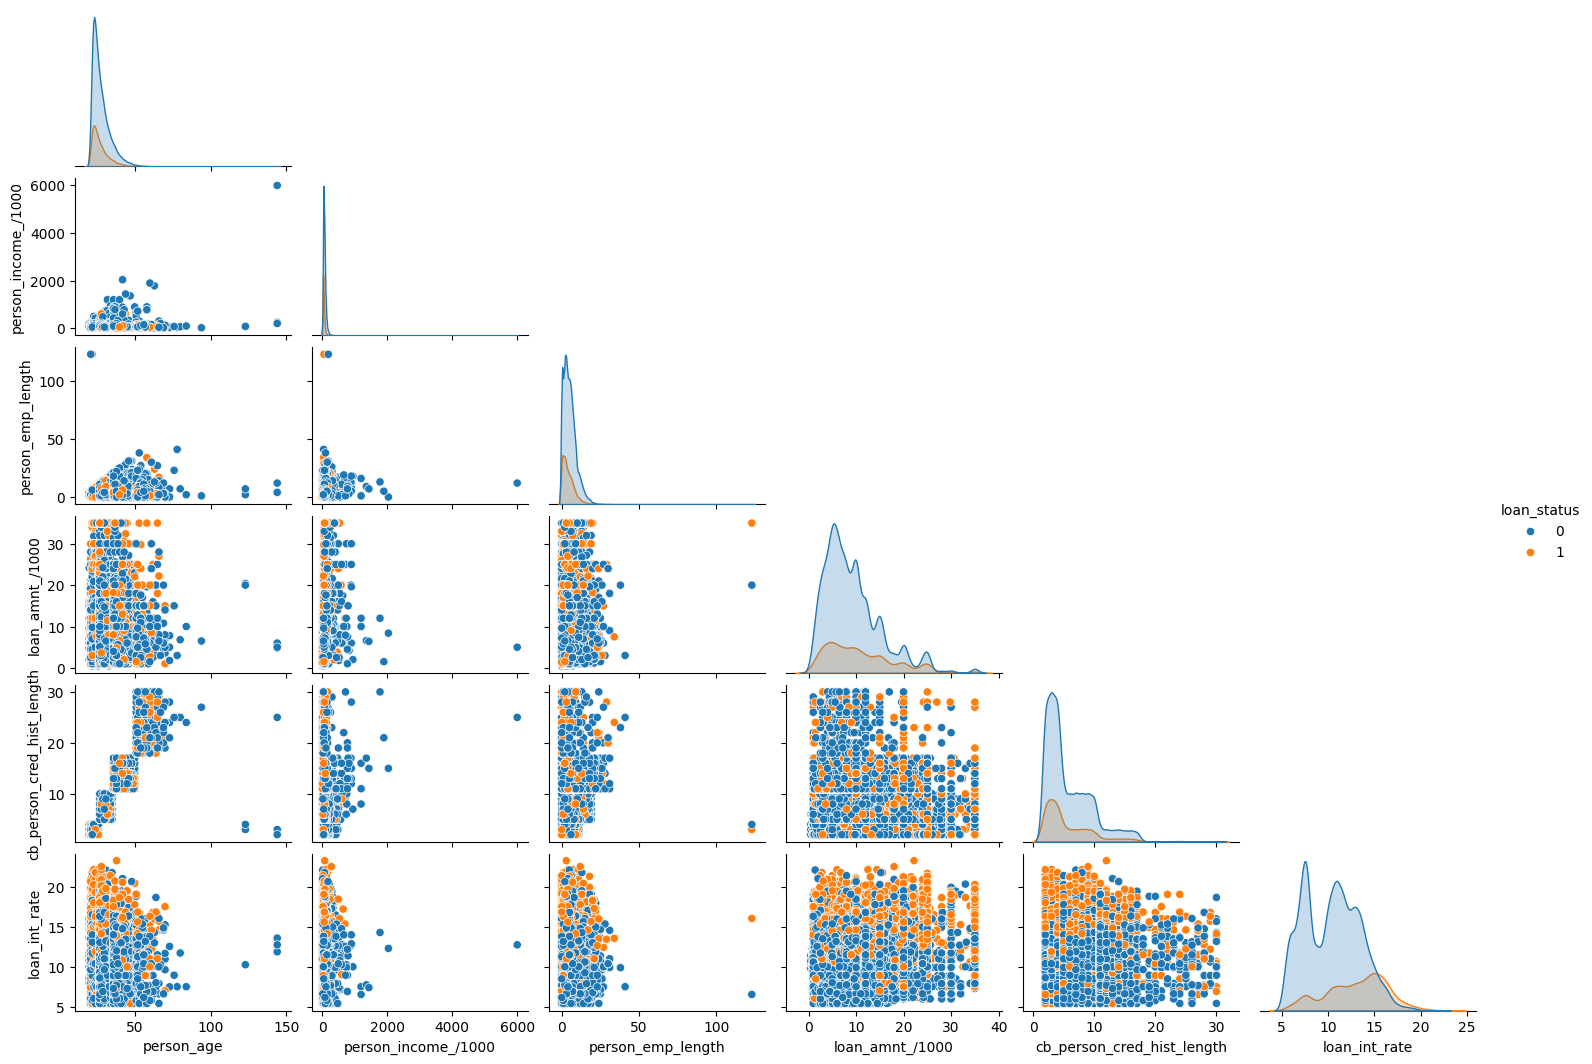

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_pair = df.copy()
df_pair['person_income_/1000'] = round(df_pair['person_income']/1_000,1)
df_pair['loan_amnt_/1000'] = round(df_pair['loan_amnt']/1_000,1)
hue_order = list(df_pair['loan_status'].value_counts().index)

fig = sns.pairplot(df_pair[['person_age','person_income_/1000','person_emp_length','loan_amnt_/1000','loan_status','cb_person_cred_hist_length','loan_int_rate']],
                   corner=True,height=1.8,aspect=1.4,hue='loan_status',hue_order=hue_order)
#fig.set(title='Pairplot')
plt.show()

In [ ]:
def count_out(var,value,dataset=df_pair):
    percent = 100*(dataset[dataset[var]>value].count()/dataset.count()).mean()
    cases = (dataset[dataset[var]>value].count()).mean()
    return 'Percent of rows with '+var+' over '+str(value)+': '+'{:,.3f}%'.format(percent)+'. Total cases :'+ '{:.0f}'.format(cases)
count_out('person_income_/1000',290)

'Percent of rows with person_income_/1000 over 290: 0.523%. Total cases :169'

In [ ]:
count_out('person_age',56)

'Percent of rows with person_age over 56: 0.380%. Total cases :123'

In [ ]:
count_out('person_emp_length',21)

'Percent of rows with person_emp_length over 21: 0.225%. Total cases :73'

### **The atypicality of some values of the variables `person_income`, `person_age` and `person_emp_length` are very high plus few of them have a low reliability such as `person_age` or `person_emp_length` over 57 and 21 respectively or a annual income over 300.000, therefore the pairplot will be reploted ignoring this values.**

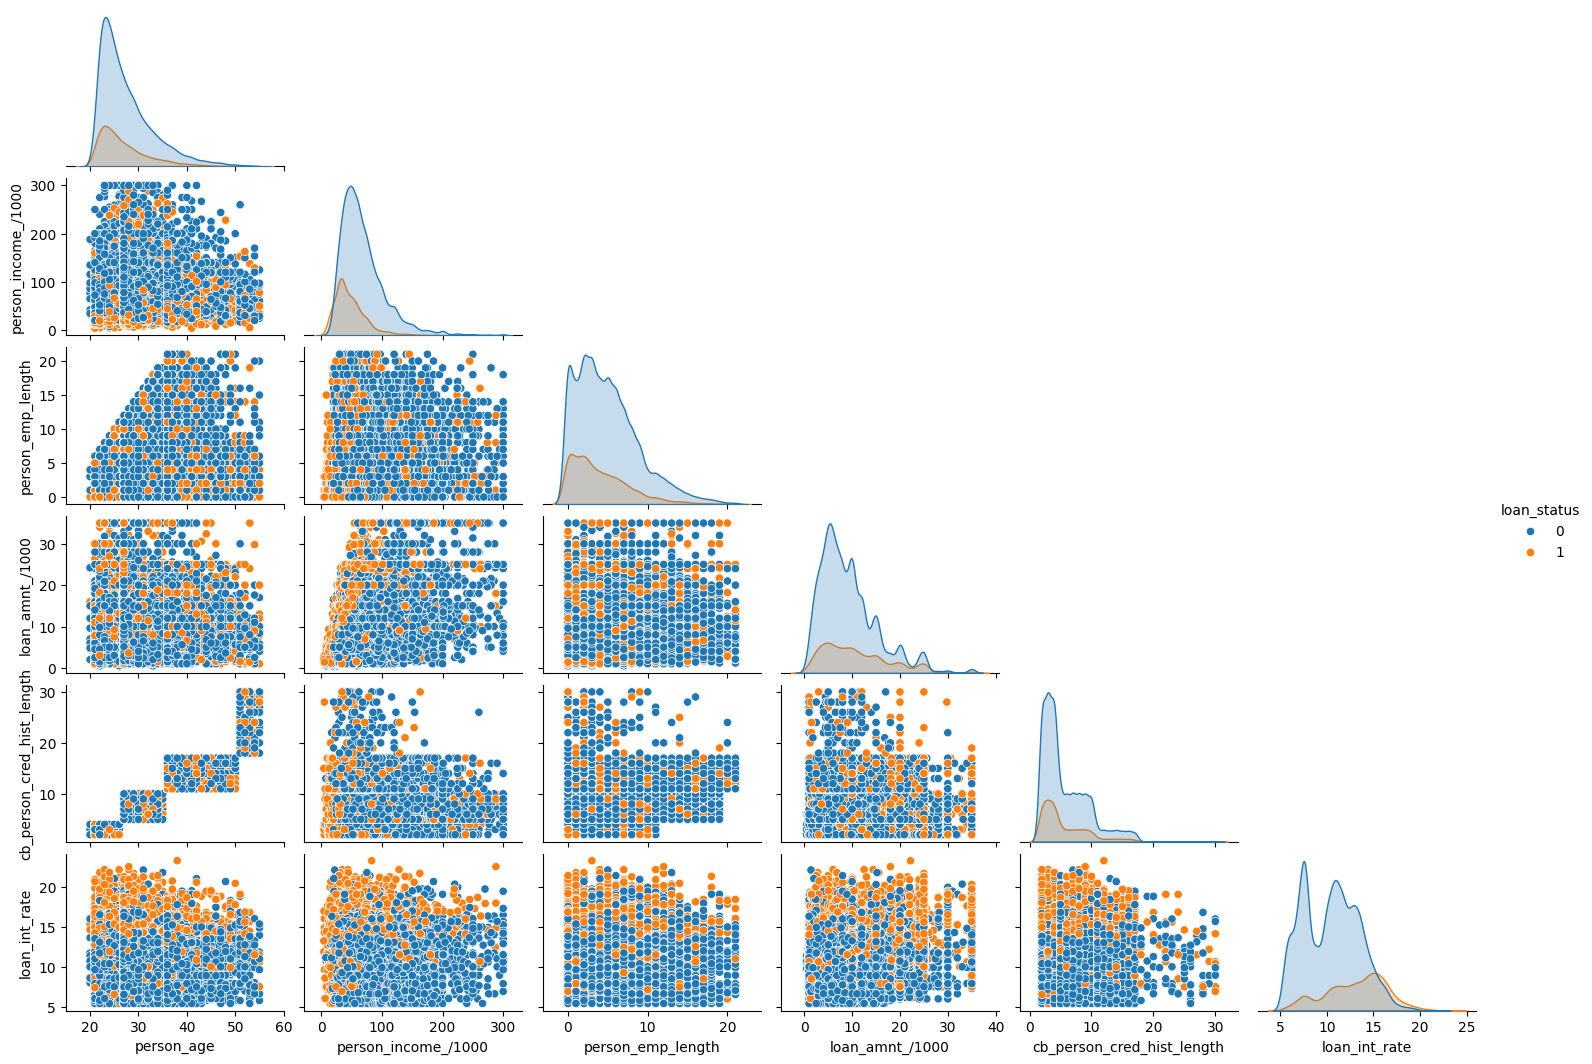

In [ ]:
df_pair = df_pair[(df_pair['person_age']<56)&(df_pair['person_emp_length']<=21)&(df_pair['person_income_/1000']<=300)]
fig = sns.pairplot(df_pair[['person_age','person_income_/1000','person_emp_length','loan_amnt_/1000','loan_status','cb_person_cred_hist_length','loan_int_rate']],
                   corner=True,height=1.8,aspect=1.4,hue='loan_status',hue_order=hue_order)
#fig.set(title='Pairplot')
plt.show()

### **It is possible to identify from this pairplot some insights:**
- Persons with a high `person_age` not necesary have a high `person_income`.
- The Behaviour between `person_age` and  `cb_person_cred_hist_length` is 'perfectly strange' it suggest that this data could have been imputed or modified, same case between `person_emp_length` and `cb_person_cred_hist_length`.
- The `loan_int_rate` that is most common in defautl credits is about 15%.

## **Correlogram**

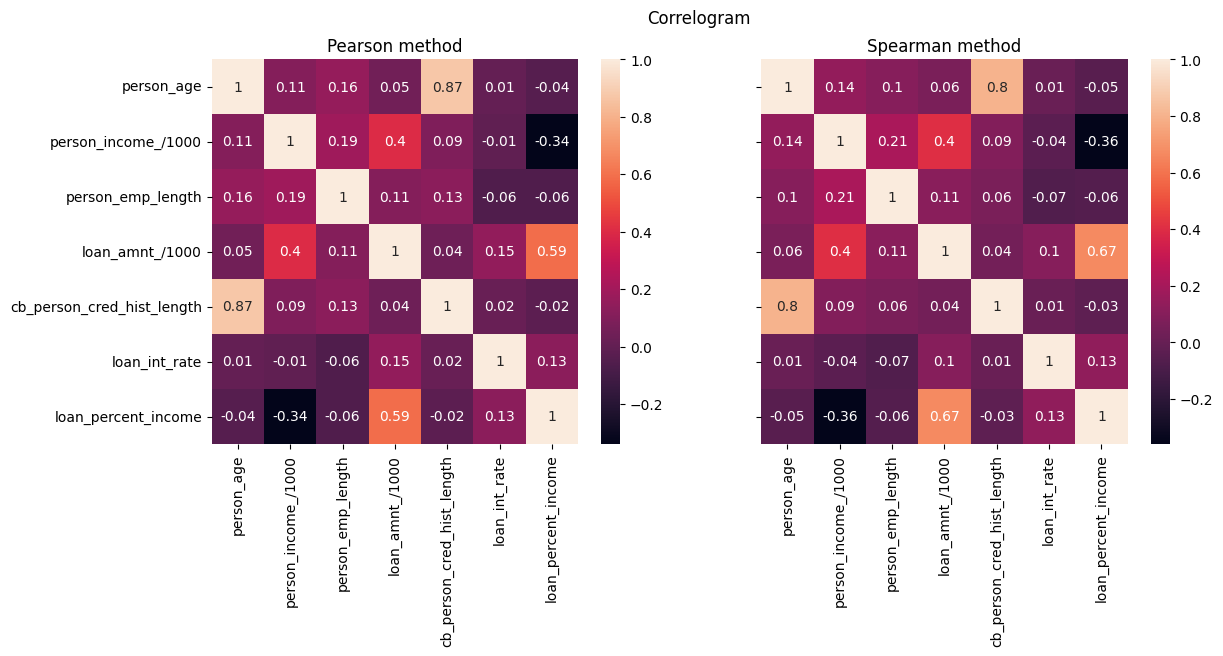

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(13,5),sharey=True)
fig.suptitle('Correlogram')

sns.heatmap(ax=ax[0],data = df_pair[['person_age','person_income_/1000','person_emp_length','loan_amnt_/1000','cb_person_cred_hist_length','loan_int_rate','loan_percent_income']].corr(method='pearson').round(2), annot = True)
ax[0].set_title('Pearson method')

sns.heatmap(ax=ax[1],data = df_pair[['person_age','person_income_/1000','person_emp_length','loan_amnt_/1000','cb_person_cred_hist_length','loan_int_rate','loan_percent_income']].corr(method='spearman').round(2), annot = True)
ax[1].set_title('Spearman method')
plt.show()

### **Using correlograms It can be recognized some correlations between**

- `cb_person_cred_hist_length` and `person_age`
- `loan_amnt_/1000` and `loan_percent_income`
- `person_income_/1000` and `loan_amnt_/1000`
- `loan_percent_income` and `person_income_/1000`

## **Cualitative variables**

In [ ]:
def cualitative(variable):
    bar_plot = pd.pivot_table(df_pair,
                             index=[variable,'loan_status'],
                             aggfunc='count',
                             values='person_age',
                             sort=False).reset_index().rename(columns={'person_age':'Count'})
    bar_plot['loan_status'] = bar_plot['loan_status'].apply(lambda x: str(x))

    names = list(bar_plot[variable].value_counts().index)
    cont =0
    for i in names:
        cont = cont+1
        total = bar_plot[(bar_plot[variable] == i)]['Count'].sum()
        percentage = 100*round(bar_plot[(bar_plot[variable] == i)&(bar_plot['loan_status'] == '1')]['Count'].values[0]/total,2)

        if cont == 1:
            max_ = percentage
            label = i
            continue
        if percentage >= max_:
            max_ = percentage
            label = i


    text = 'The group with most loan status is '+ label + ' with '+ '{:.0f}'.format(max_)+'% '

    fig = px.bar(bar_plot.sort_values('Count',ascending=False),
                y=variable,
                x='Count',
                color='loan_status',
                text='Count',
                title='Distribution loan status variable '+variable,
                height=450,width=800,
                labels={'Count':text})

    # fig.add_annotation(xref=0.2,  y=-1.0,
    #         text="Text annotation without arrow",
    #         showarrow=False)

    return fig.show()

In [ ]:
for j in ['cb_person_default_on_file', 'loan_grade', 'loan_intent', 'person_home_ownership']:
    cualitative(j)

### **From this plots we obtain the following insights:**
- People that was in default once is most likely to be in default again (as expected).
- The lower the loan grade, the more likely the borrower is to default (as expected), however, regardless of the loan grade, the risk is always greater than 10%.
- Debconsolidation is the loan intent that is most likely to went to default (as expected) however Medical loan intentions have almost the same level of riskiness.
- People with extrange home ownership or in rent are inclined to be in default (as expected), people who rent are the ones who ask for loans the most.

## **Bar plots to see some behaviours between cualitative and quantitative variables**

In [ ]:
bar_plot = pd.pivot_table(df_pair,
                         index=['loan_intent','loan_status','person_home_ownership'],
                         aggfunc='count',
                         values='person_income',
                         sort=False).reset_index().rename(columns={'person_income':'count'})
bar_plot['loan_status'] = bar_plot['loan_status'].apply(lambda x: str(x))


fig = px.bar(bar_plot, x="loan_status", y="count", color="loan_status", barmode="group",
             facet_row="loan_intent", facet_col="person_home_ownership",
             height=1450,width=1200,text_auto=True,
            title='Barplots default count person_home_ownership and loan_intent')
             # category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
             #                  "time": ["Lunch", "Dinner"]})
fig.show()

### **With the previous plot it is possible to confirm that people who rent is probable to go to deafault in any `loan_intent` especially in Home improvement ( a `loan_intent` very strange for someone who rents) and there are not many 'OTHER' home ownerships status in the dataset.**

In [ ]:
bar_plot = pd.pivot_table(df_pair,
                         index=['loan_intent','cb_person_default_on_file'],
                         aggfunc='median',
                         values='loan_amnt',
                         sort=False).reset_index().rename(columns={'loan_amnt':'median'})
bar_plot['median'] = bar_plot['median'].apply(lambda x: round(x,0))
#bar_plot['loan_status'] = bar_plot['loan_status'].apply(lambda x: str(x))


fig = px.bar(bar_plot, x="cb_person_default_on_file", y="median", color="cb_person_default_on_file", barmode="group",
             facet_row="loan_intent",
             #facet_col="cb_person_default_on_file",
             height=1500,width=1000,text=bar_plot['median'].apply(lambda x: '{:,.0f}'.format(x).replace(',','.')),
            title='Barplots loan_amnt median by loan_intent and cb_person_default_on_file')
fig.show()

### **It is interisting to see that that the median of the `loan_amnt` is almost the same in any `loan_intent` no matter if the loan is in default or not.**

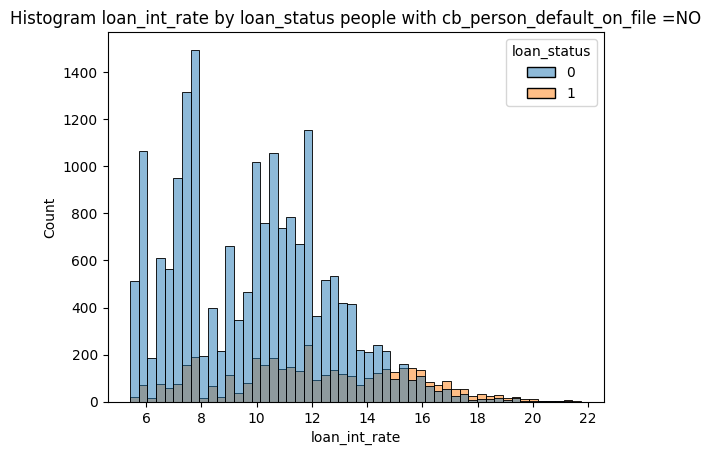

In [ ]:
df_pair_pr = df_pair[df_pair['cb_person_default_on_file']=='N'].copy()
df_pair_pr['loan_status'] = df_pair_pr['loan_status'].apply(lambda x:str(x))
var='loan_int_rate'
hue = "loan_status"
hue_order = list(df_pair_pr[hue].value_counts().index)
fig2 = sns.histplot(data=df_pair_pr, x=var, hue=hue,hue_order=hue_order )
fig2.set_title('Histogram '+var+' by '+hue+ ' people with cb_person_default_on_file =NO')
plt.show()

### **Even someone who has never been in default before is most likely to go to deafault in a loan or credit with a hight int_rate**

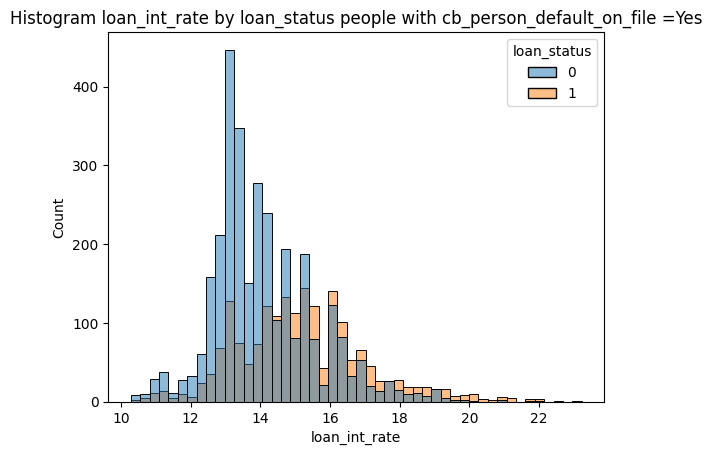

In [ ]:
df_pair_pr = df_pair[df_pair['cb_person_default_on_file']=='Y'].copy()
df_pair_pr['loan_status'] = df_pair_pr['loan_status'].apply(lambda x:str(x))
var='loan_int_rate'
hue = "loan_status"
fig2 = sns.histplot(data=df_pair_pr, x=var, hue=hue,hue_order=hue_order)
fig2.set_title('Histogram '+var+' by '+hue+ ' people with cb_person_default_on_file =Yes')
plt.show()

## **People who has already been in default is highly likely to go again in default with `loan_rate` above 15%**

In [ ]:
def age_calisfication(x,skips = 3):
    for i in range(20,60,skips):
        if i <= x < (i+skips):
            return 'Age greather or equal than '+str(i)+' but less than '+ str(i+skips)
df_pair['age_calisfication'] = df_pair['person_age'].apply(lambda x : age_calisfication(x,4))
df_age_c = pd.pivot_table(df_pair,
              index=('age_calisfication'),
              values='person_income',
              aggfunc=('median','count')).round(1).reset_index().rename(columns={'median':'person_income_median'})
px.bar(df_age_c,
      y = 'age_calisfication',
      x='person_income_median',
      height=550,
      width=1000,
      text='person_income_median',
      title='Median person income by age')

<ipython-input-21-3c99c4373bf8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **From the last graph you can see that**

- all salaries in the data set are very high regardless of age.

- Normally, a person reaches his or her highest salary after the age of 28.


In [ ]:
def age_calisfication(x,skips = 3):
    for i in range(20,70,skips):
        if i <= x < (i+skips):
            return 'Age greather or equal than '+str(i)+' but less than '+ str(i+skips)
df_pair['age_calisfication'] = df_pair['person_age'].apply(lambda x : age_calisfication(x,4))
df_age_c = pd.pivot_table(df_pair,
              index=('age_calisfication','loan_status'),
              values='person_income',
              aggfunc=('count')).round(1).reset_index().rename(columns={'person_income':'Count'})
df_age_c['loan_status'] = df_age_c['loan_status'].apply(lambda x : str(x))
px.bar(df_age_c,
      y = 'age_calisfication',
      x='Count',
      height=550,
      width=1000,
      color='loan_status',
      text= 'Count',
      title='Count loan status by age')

<ipython-input-22-24aa58d3ed69>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
variable = 'age_calisfication'
names = list(df_age_c['age_calisfication'].value_counts().index)
names.sort()
cont =0
for i in names:
    cont = cont+1
    total = df_age_c[(df_age_c[variable] == i)]['Count'].sum()
    percentage = df_age_c[(df_age_c[variable] == i)&(df_age_c['loan_status'] == '1')]['Count'].values[0]/total
    percentage = 100*percentage
    percentage = round(percentage,1)

    if cont == 1:
        dic = {i:percentage}
        continue
    else:
        dic = dic | {i:percentage}
plot = pd.DataFrame(index=dic.keys(),data=dic.values()).reset_index()
plot.columns = ['age_calisfication','Percentage_default']
px.bar(plot,
      y='age_calisfication',
      x='Percentage_default',
      height=550,
      width=950,
      text='Percentage_default',
      title='Percentage default by age')

## **Despite of from 28 years old the salaries are the highest the default riskiness is not reduced significantly from this age.**

## **Conclutions**
- The target variable is unbalaced.

- Persons with a high `person_age` not necesary have a high `person_income`.
- The Behaviour between `person_age` and  `cb_person_cred_hist_length` is 'perfectly strange' it suggest that this data could have been imputed or modified, same case between `person_emp_length` and `cb_person_cred_hist_length`.
- The `loan_int_rate` that is most common in defautl credits is about 15%.

- Using correlograms it is possible to see acorrelation between :
- `cb_person_cred_hist_length` and `person_age`
- `loan_amnt_/1000` and `loan_percent_income`
- `person_income_/1000` and `loan_amnt_/1000`
- `loan_percent_income` and `person_income_/1000`

- People that was in default once is most likely to be in default again (as expected).
- The lower the loan grade, the more likely the borrower is to default (as expected), however, regardless of the loan grade, the risk is always greater than 10%.
- Debconsolidation is the loan intent that is most likely to went to default (as expected) however Medical loan intentions have almost the same level of riskiness.
- People who rent are the ones who ask for loans the most.

- With the previous plot it is possible to confirm that people who rent is probable to go to deafault in any `loan_intent` especially in Home improvement ( a `loan_intent` very strange for someone who rents) and there are not many 'OTHER' home ownerships status in the dataset.

- It is interisting to see that that the median of the `loan_amnt` is almost the same in any `loan_intent` no matter if the loan is in default or not.

- Even someone who has never been in default before is most likely to go to deafault in a loan or credit with a hight `int_rate`.


- People who has already been in default is highly likely to go again in default with `loan_rate` above 15%

- all salaries in the data set are very high regardless of age.

- From approximately age 56 salaries begin to decrease.

- Normally, a person reaches his or her highest salary after the age of 29.

- Despite of from 29 years old the salaries are the highest the default riskiness is not reduced significantly about this age.

# <font color=blue> **3. Data Preparation** </font>

- dirty data elimination
- delete highly correlated variables
- outliers tratement
- one hoot encoding
- Scaling
- PCA


## **There are some missing values specially in the variables `loan_int_rate` and `person_emp_length`**

In [ ]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
'The maximum percent of missing values is: '+'{:,.2f}%'.format(100*df.isna().sum().sum()/df.shape[0])

'The maximum percent of missing values is: 12.31%'

## **Around 12.31% of the dataset have missing values, it is a big percent**

In [ ]:
var = 'person_emp_length'
'The percent of missing values in '+var+' is: '+'{:,.2f}%'.format(100*df.isna().sum().loc[var]/df.shape[0])

'The percent of missing values in person_emp_length is: 2.75%'

In [ ]:
df[df['person_emp_length'].isna()].sample(4)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
25994,31,95000,MORTGAGE,NaN,HOMEIMPROVEMENT,A,5000,6.03,0,0.05,N,5
10533,24,68400,MORTGAGE,NaN,PERSONAL,A,3000,5.42,0,0.04,N,4
31064,44,62400,RENT,NaN,HOMEIMPROVEMENT,E,10000,16.82,1,0.16,N,15
5632,23,45600,MORTGAGE,NaN,MEDICAL,B,3000,11.49,0,0.07,N,4


### **`person_age` was taken into account to impute these missing values in `person_emp_length`, obtainig the mean of groups of 4 years `person_age` to imput the missing values of `person_emp_length`**



In [ ]:
df['age_calisfication'] = df['person_age'].apply(lambda x : age_calisfication(x,4))
age_emp =  pd.pivot_table(df,
               index='age_calisfication',
               values='person_emp_length',
               aggfunc=('mean','median','count')).round(1).rename(columns={'mean':'person_emp_length_mean'}).reset_index()
age_emp

,age_calisfication,count,person_emp_length_mean,median
0,Age greather or equal than 20 but less than 24,8486,3.7,4.0
1,Age greather or equal than 24 but less than 28,10922,4.6,4.0
2,Age greather or equal than 28 but less than 32,5827,5.4,4.0
3,Age greather or equal than 32 but less than 36,3073,5.7,4.0
4,Age greather or equal than 36 but less than 40,1657,5.9,4.0
5,Age greather or equal than 40 but less than 44,837,6.1,4.0
6,Age greather or equal than 44 but less than 48,427,6.4,5.0
7,Age greather or equal than 48 but less than 52,211,6.0,4.0
8,Age greather or equal than 52 but less than 56,109,5.6,3.0
9,Age greather or equal than 56 but less than 60,53,6.5,5.0


In [ ]:
df.fillna({'person_emp_length':-1},inplace=True)

def person_emp_length_imputer(x):
  if x['person_emp_length']==-1:
    return age_emp[age_emp['age_calisfication'] ==x['age_calisfication']]['person_emp_length_mean'].values[0]
  else:
    return x['person_emp_length']

df['person_emp_length'] = df.apply(lambda df: person_emp_length_imputer(df),axis=1)

In [ ]:
var = 'person_emp_length'
'The percent of missing values in '+var+' is: '+'{:,.2f}%'.format(100*df.isna().sum().loc[var]/df.shape[0])

'The percent of missing values in person_emp_length is: 0.00%'

### **Since `loan_int_rate` is influnced by `cb_person_default_on_file`  in order to imput the missing values of `loan_int_rate` the variable `cb_person_default_on_file` will be take in account.**

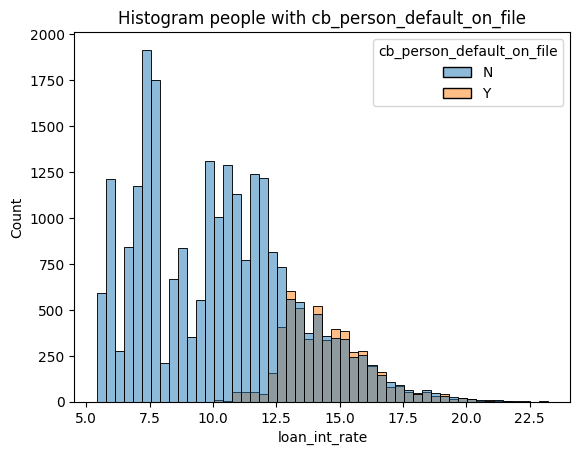

In [ ]:
hue_order = list(df['cb_person_default_on_file'].value_counts().index)
fig3 = sns.histplot(data=df, x='loan_int_rate', hue='cb_person_default_on_file',hue_order=hue_order)
fig3.set_title('Histogram people with cb_person_default_on_file')
plt.show()

In [ ]:
df_hist = pd.pivot_table(df,index=['cb_person_default_on_file'],
                         values='loan_int_rate',aggfunc='median').reset_index().round(1)

df.fillna({'loan_int_rate':-100},inplace=True)
def loan_int_rate_imputer(x):
  if x['loan_int_rate']==-100:
    return df_hist[df_hist['cb_person_default_on_file'] ==x['cb_person_default_on_file']]['loan_int_rate'].values[0]
  else:
    return x['loan_int_rate']

df['loan_int_rate'] = df.apply(lambda df: loan_int_rate_imputer(df),axis=1)

In [ ]:
var = 'loan_int_rate'
'The percent of missing values in '+var+' is: '+'{:,.2f}%'.format(100*df.isna().sum().loc[var]/df.shape[0])

'The percent of missing values in loan_int_rate is: 0.00%'

### **There are not more missing data**

In [ ]:
df.drop('age_calisfication',axis=1,inplace=True)
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


## **From the understanding the data,  some data preparations were discovered, about outliers and dirty data**

In [ ]:
df['loan_status'] = df['loan_status'].apply(lambda x : str(x))
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.73,6.35,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.85,61983.12,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,32581.0,4.79,4.09,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.37,6322.09,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,32581.0,11.02,3.11,5.42,8.49,10.74,13.35,23.22
loan_percent_income,32581.0,0.17,0.11,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.80,4.06,2.00,3.00,4.00,8.00,30.00


In [ ]:
count_out('person_income',290_000,df)

'Percent of rows with person_income over 290000: 0.522%. Total cases :170'

In [ ]:
count_out('person_age',56,df)

'Percent of rows with person_age over 56: 0.381%. Total cases :124'

In [ ]:
count_out('person_emp_length',19,df)

'Percent of rows with person_emp_length over 19: 0.470%. Total cases :153'

In [ ]:
count_out('cb_person_cred_hist_length',25,df)

'Percent of rows with cb_person_cred_hist_length over 25: 0.310%. Total cases :101'

### **"The atypicality of some values of the variables `person_income`, `person_age` and `person_emp_length` are very high plus few of them have a low reliability such as `person_age` or `person_emp_length` over 56 and 19 respectively or a annual income over 290.000, therefore the pairplot will be reploted ignoring this values."**

In [ ]:
df = df[(df['person_income']<=290_000)&
   (df['person_age']<=56)&
   (df['person_emp_length']<=19)&
   (df['cb_person_cred_hist_length']<=25)]
df.reset_index(inplace=True,drop=True)

In [ ]:
count_out('person_income',290_000,df)

'Percent of rows with person_income over 290000: 0.000%. Total cases :0'

### **There are not  more dirty data or outliers**

## **Principal components analysis (PCA) will be used to try to reduce the dataset dimensionality since One hot enconding is going to be used later**

In [ ]:
from sklearn.decomposition import PCA
cols = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(df[cols]))
pca_df.columns = ['PCA1','PCA2','PCA3']
pca.explained_variance_ratio_.sum()


0.9999999815214072

In [ ]:
df.drop(cols,axis=1,inplace=True)
df = pd.merge(df,pca_df,how='left',right_index=True,left_index=True)
df

,person_home_ownership,loan_intent,loan_grade,loan_status,cb_person_default_on_file,PCA1,PCA2,PCA3
0,OWN,EDUCATION,B,0,N,-54395.119932,-4685.707298,-6.179117
1,MORTGAGE,MEDICAL,C,1,N,-54075.172621,-197.095684,-2.712258
2,RENT,MEDICAL,C,1,N,3780.789998,25253.790266,-5.906874
3,RENT,MEDICAL,C,1,Y,-7291.118395,26042.993645,-3.367618
4,OWN,VENTURE,A,1,N,-53989.230112,-3210.833672,-6.524755
...,...,...,...,...,...,...,...,...
32096,OWN,PERSONAL,A,0,N,-11490.968910,877.913117,29.052271
32097,MORTGAGE,PERSONAL,A,0,N,26242.223484,-4217.790547,30.070256
32098,RENT,PERSONAL,D,1,Y,2219.554853,10327.017169,27.601529
32099,RENT,EDUCATION,B,0,N,650.339251,-4599.187652,27.779061


## **Data will be scaled using Standard scaler rather than a MinMax Scaler since regression models such as lineal regression will be used**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_PCA = ['PCA1','PCA2','PCA3']
scale_d = scaler.fit_transform(df[cols_PCA])
scale_d = pd.DataFrame(scale_d)
scale_d.columns = cols_PCA
for i in cols_PCA:
  df[i] = scale_d[i]
df.sample(3)

,person_home_ownership,loan_intent,loan_grade,loan_status,cb_person_default_on_file,PCA1,PCA2,PCA3
28087,RENT,MEDICAL,B,0,N,1.364018,-1.247157,0.892675
15360,OWN,MEDICAL,B,0,N,-1.123566,0.156724,-0.632082
3668,RENT,DEBTCONSOLIDATION,C,1,Y,-1.344899,-0.356325,-0.909187


## **In order to use all variables in a model categorical variables have need to be transformed into numerical variables.**

### **In `cb_person_default_on_file` Y can be replaced by 1 and N by 0**

In [ ]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].apply(lambda x: 1 if x=='Y' else 0 )
df

,person_home_ownership,loan_intent,loan_grade,loan_status,cb_person_default_on_file,PCA1,PCA2,PCA3
0,OWN,EDUCATION,B,0,0,-1.481070,-0.820629,-0.940354
1,MORTGAGE,MEDICAL,C,1,0,-1.472359,-0.034518,-0.412759
2,RENT,MEDICAL,C,1,0,0.102943,4.422809,-0.898924
3,RENT,MEDICAL,C,1,1,-0.198523,4.561026,-0.512493
4,OWN,VENTURE,A,1,0,-1.470018,-0.562328,-0.992954
...,...,...,...,...,...,...,...,...
32096,OWN,PERSONAL,A,0,0,-0.312876,0.153753,4.421251
32097,MORTGAGE,PERSONAL,A,0,0,0.714523,-0.738680,4.576170
32098,RENT,PERSONAL,D,1,1,0.060434,1.808617,4.200473
32099,RENT,EDUCATION,B,0,0,0.017707,-0.805476,4.227490


### For `loan_intent` and `person_home_ownership` one hot encoding will be used

In [ ]:
for i in ['loan_intent','person_home_ownership']:
  df = pd.get_dummies(df,prefix=i,columns=[i],dtype=int)
df

,loan_grade,loan_status,cb_person_default_on_file,PCA1,PCA2,PCA3,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,B,0,0,-1.481070,-0.820629,-0.940354,0,1,0,0,0,0,0,0,1,0
1,C,1,0,-1.472359,-0.034518,-0.412759,0,0,0,1,0,0,1,0,0,0
2,C,1,0,0.102943,4.422809,-0.898924,0,0,0,1,0,0,0,0,0,1
3,C,1,1,-0.198523,4.561026,-0.512493,0,0,0,1,0,0,0,0,0,1
4,A,1,0,-1.470018,-0.562328,-0.992954,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32096,A,0,0,-0.312876,0.153753,4.421251,0,0,0,0,1,0,0,0,1,0
32097,A,0,0,0.714523,-0.738680,4.576170,0,0,0,0,1,0,1,0,0,0
32098,D,1,1,0.060434,1.808617,4.200473,0,0,0,0,1,0,0,0,0,1
32099,B,0,0,0.017707,-0.805476,4.227490,0,1,0,0,0,0,0,0,0,1


### **Since `loan_grade` is  a ordinal categorical variable: A will be changed with 0.143, B with 0.286, and and so on until G with 1**



In [ ]:
def loan_grade_number(x):
  dict_ = {'A':0.143,'B':0.286,'C':0.429,'D':0.572,'E':0.715,'F':0.858,'G':1}
  return dict_[x['loan_grade']]
df['loan_grade'] = df.apply(lambda df: loan_grade_number(df),axis=1)
df.sample(3)

,loan_grade,loan_status,cb_person_default_on_file,PCA1,PCA2,PCA3,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
2523,0.143,0,0,-0.923153,-0.725266,-0.591669,0,1,0,0,0,0,0,0,0,1
17052,0.429,0,1,1.292164,2.121785,-0.661537,0,0,1,0,0,0,0,0,0,1
12259,0.429,1,1,0.285398,-0.050314,-0.842053,0,0,0,0,0,1,1,0,0,0


# <font color=blue> **4. Modeling** </font>

## **Having the data prepared it is possible to compare models, the models that will be compared are:**
- Logistic regression
- Desicion tree classifier
- Naive Bayes classifier
- Suppor vector machine classifier
- K nearest neighbors clasifier
- Random Forest classifier (assembly model bagging)
- Gradient Boosting classifier (assembly model boosting)
- XGBoost classifier(assembly model bagging)
- Adaboost classifier (assembly model boosting)

In [ ]:
#df.to_csv('prepared_data.csv',index=False)}
import pandas as pd
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Credit_risk/prepared_data.csv'
df = pd.read_csv(file_path)
df.sample(3)

Mounted at /content/drive


,loan_grade,loan_status,cb_person_default_on_file,PCA1,PCA2,PCA3,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
3790,0.143,0,0,-0.689209,-0.305789,-0.314715,1,0,0,0,0,0,1,0,0,0
10024,0.143,0,0,0.032255,-0.724357,-0.750785,0,1,0,0,0,0,1,0,0,0
28009,0.143,0,0,0.555053,-0.349525,1.094995,0,1,0,0,0,0,0,0,0,1


### **To compare all the models, a random grid search will be started for each model and the score will be balanced_accuracy as the dataset is not balanced. 20% of the data is saved for testing the final model this data will not be shown to the model in any point of the training**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb # check RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf

df_train, df_test, target_train, target_test = train_test_split(df.drop('loan_status',axis=1), df['loan_status'],
                                                    test_size=0.2, random_state=42,stratify=df['loan_status'])

LogisticRegression_params = {'penalty':['l1','l2',None],
                             'class_weight':[None,{'1':1,'0':0.6}],
                             'class_weight':[{1:0.7,0:0.3}]}

DecisionTreeClassifier_params = {'criterion':['gini','entropy'],
                                 'max_depth':[None,7,50],
                                 'min_samples_leaf':[1,10],
                                 'class_weight':[{1:0.7,0:0.3}]}

GaussianNB_params = {'priors':[None]}

SVC_params = {'kernel':['rbf','poly','linear'],
              'class_weight':[{1:0.7,0:0.3}]}

KNeighborsClassifier_params = {'n_neighbors':[5,2,10],
                               'p':[1,2]}

RandomForestClassifier_params = {'n_estimators':[2,10,100],
                                 'criterion':['gini','entropy'],
                                 'class_weight':[{1:0.7,0:0.3}]}

GradientBoostingClassifier_params ={'loss':['log_loss','exponential'],
                                    'learning_rate':[0.1,0.14,0.2],
                                    'n_estimators':[100,2,10]}


AdaBoostClassifier_params = {'estimator':[None,LogisticRegression(),GaussianNB()],
                             'n_estimators':[10,50,100],
                             'learning_rate':[0.1,0.2]}

LogisticRegression_model = LogisticRegression()

DecisionTreeClassifier_model = DecisionTreeClassifier()

GaussianNB_model = GaussianNB()

SVC_model = SVC()

KNeighborsClassifier_model = KNeighborsClassifier()

RandomForestClassifier_model = RandomForestClassifier()

GradientBoostingClassifier_model = GradientBoostingClassifier()

AdaBoostClassifier_model = AdaBoostClassifier()

models = [LogisticRegression_model, DecisionTreeClassifier_model, GaussianNB_model, SVC_model, KNeighborsClassifier_model,
          RandomForestClassifier_model, GradientBoostingClassifier_model, AdaBoostClassifier_model]


params = [LogisticRegression_params, DecisionTreeClassifier_params, GaussianNB_params, SVC_params, KNeighborsClassifier_params,
          RandomForestClassifier_params, GradientBoostingClassifier_params, AdaBoostClassifier_params]

rgscv_models = []
for i,j in zip(models,params):
  rgscv =  RandomizedSearchCV(i,param_distributions=j,cv=4,verbose=0,random_state=42,scoring='balanced_accuracy')
  rgscv.fit(df_train,target_train)
  rgscv_models.append(rgscv.best_estimator_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
4 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrap

### **Having tested some of the models parameters it is time to evaluate the models with the recall score, since one of the objetives is classify correctly people who will go to default.**

In [ ]:
from sklearn.model_selection import cross_val_score


models_name = ['LogisticRegression', 'DecisionTreeClassifier', 'GaussianNB', 'SVC', 'KNeighborsClassifier',
          'RandomForestClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier']
scores = {}
for i,j in zip(models_name,rgscv_models):
  score = {i:cross_val_score(j,df_train,target_train, cv=5,scoring='recall')}
  scores = {**scores,**score}

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

### **DecisionTreeClassifier and Support vector classifier were the models with the lowest bias and highest robustness.**

In [ ]:
scores_df = pd.DataFrame(scores)
fig_scores = pd.melt(scores_df,value_vars=scores_df.columns)
fig_scores.columns= ['Model','recall']
fig_scores['cv'] = ['CV_'+str(i) for i in range(5)]*8
fig_scores.sort_values(['cv','recall'],ascending=[True,False],inplace=True)
fig_scores = fig_scores.round(3)
px.bar(fig_scores,
       x='cv',y='recall',color='Model',
       barmode='group',
       text='recall',
       height=500,width=1100,
       title='Comparison recall, cross validation')


### **DecisionTreeClassifier is the model that will be choose one, a more extensive Randomized Grid search will be applied to this model**

In [ ]:
DecisionTreeClassifier_params = {'min_samples_split':[2,6,18],
                                 'splitter':['best', 'random'],
                                 'criterion':['gini','entropy'],
                                 'max_depth':[None,2,13],
                                 'min_samples_leaf':[1,3,5],
                                 'class_weight':[{1:0.75,0:0.25},{1:0.6,0:0.4},{1:0.7,0:0.3}]}

DecisionTreeClassifier_ = DecisionTreeClassifier()
rgscv =  RandomizedSearchCV(DecisionTreeClassifier_,param_distributions=DecisionTreeClassifier_params,
                            cv=4,verbose=1,random_state=42,scoring='recall',n_iter=100)

rgscv.fit(df_train,target_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'class_weight': [{0: 0.25, 1: 0.75},
                                                         {0: 0.4, 1: 0.6},
                                                         {0: 0.3, 1: 0.7}],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 13],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 6, 18],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='recall', verbose=1)

In [ ]:
model = rgscv.best_estimator_
model

DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.75}, criterion='entropy',
                       min_samples_leaf=3)

# <font color=blue> **5. Evaluation** </font>

### **Having the final model it is time to evaluate it. The balanced_accuracy and scores are really good, and even more the model is very Robust**

In [ ]:
cvs_ba = {'balanced_accuracy':cross_val_score(model,df_train,target_train, cv=5,scoring='balanced_accuracy')}
cvs_recall = {'recall':cross_val_score(model,df_train,target_train, cv=5,scoring='recall')}

final_scores = pd.DataFrame({**cvs_ba,**cvs_recall})
final_scores['cv'] = ['cv_'+str(i) for i in range(5)]
final_scores = final_scores.round(3)
px.bar(final_scores,
       x='cv',
       y=['recall','balanced_accuracy'],
       title='Final model (DecisionTreeClassifier), Cross validation balanced_accuracy and recall',
       barmode='group',
       text_auto=True,
       height=400,
       width=800)

### **classification_report confirms with differents scores that the models bias is very low**

In [ ]:
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(df_train, target_train, test_size=0.33, random_state=42,stratify=target_train)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      6624
           1       0.65      0.75      0.70      1851

    accuracy                           0.86      8475
   macro avg       0.79      0.82      0.80      8475
weighted avg       0.87      0.86      0.86      8475



### **With a confusion matrix it is possible to see that False negatives are less than False positives, so the model is good to predict people who will go to default.**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[1,0], sample_weight=None, normalize=None)

array([[1388,  463],
       [ 752, 5872]])

### **Finally, the model is going to be tested with the 20% that was saved and was never exposed to the train of any model**

In [ ]:
#df_test, target_test
cvs_ba = {'balanced_accuracy':cross_val_score(model,df_test,target_test, cv=5,scoring='balanced_accuracy')}
cvs_recall = {'recall':cross_val_score(model,df_train,target_train, cv=5,scoring='recall')}

final_scores = pd.DataFrame({**cvs_ba,**cvs_recall})
final_scores['cv'] = ['cv_'+str(i) for i in range(5)]
final_scores = final_scores.round(3)
px.bar(final_scores,
       x='cv',
       y=['recall','balanced_accuracy'],
       title='Final model (DecisionTreeClassifier), Cross validation balanced_accuracy and recall',
       barmode='group',
       text_auto=True,
       height=400,
       width=800)

In [ ]:
model.fit(df_train,target_train)
y_pred = model.predict(df_test)
print(classification_report(target_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5018
           1       0.66      0.76      0.71      1403

    accuracy                           0.86      6421
   macro avg       0.79      0.82      0.81      6421
weighted avg       0.87      0.86      0.86      6421



In [ ]:
confusion_matrix(target_test,y_pred, labels=[1,0], sample_weight=None, normalize=None)

array([[1066,  337],
       [ 553, 4465]])

### **Let see the features importances**

In [ ]:
features = pd.DataFrame(index=df_train.columns,data=model.feature_importances_).reset_index()
features.columns = ['Feature','Importance']
features.sort_values('Importance',ascending=False)

,Feature,Importance
2,PCA1,0.316930
3,PCA2,0.211770
0,loan_grade,0.169791
4,PCA3,0.097184
14,person_home_ownership_RENT,0.072842
13,person_home_ownership_OWN,0.027423
5,loan_intent_DEBTCONSOLIDATION,0.026763
8,loan_intent_MEDICAL,0.021554
7,loan_intent_HOMEIMPROVEMENT,0.015599
10,loan_intent_VENTURE,0.014636


In [ ]:
#!pip sklearn.externals
import joblib
# save model
joblib.dump(model, 'model_credik_risk.pkl')

# load model
model_ = joblib.load('model_credik_risk.pkl')

# <font color=blue> **6. Deployment** </font>